In [59]:
# basic DS imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# time series imports
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import Holt
from prophet import Prophet

# shhhh (clean report without notifications of plot size issues, etc.)
import warnings
warnings.filterwarnings("ignore")

Checking out our initial data so we can focus on the city/state/area, but we need to know what areas there are first! So let's go.

In [60]:
df = pd.read_csv("GlobalTemperatures.csv")
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_country = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
df_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [62]:
df_major_city = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")
df_major_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [63]:
df_country.Country.unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [64]:
df_country[df_country.Country == "South Korea"]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
488387,1841-01-01,-3.677,2.670,South Korea
488388,1841-02-01,-1.420,1.998,South Korea
488389,1841-03-01,2.849,2.006,South Korea
488390,1841-04-01,9.675,2.254,South Korea
488391,1841-05-01,15.345,1.813,South Korea
...,...,...,...,...
490455,2013-05-01,17.862,0.253,South Korea
490456,2013-06-01,22.436,0.485,South Korea
490457,2013-07-01,26.571,0.757,South Korea
490458,2013-08-01,27.601,0.524,South Korea


In [65]:
df_major_city.City.unique()

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo',
       'S

In [66]:
df_major_city[df_major_city.City == "Seoul"]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
203039,1839-01-01,-4.570,2.394,Seoul,South Korea,37.78N,126.10E
203040,1839-02-01,-2.520,2.602,Seoul,South Korea,37.78N,126.10E
203041,1839-03-01,0.678,2.041,Seoul,South Korea,37.78N,126.10E
203042,1839-04-01,8.828,2.068,Seoul,South Korea,37.78N,126.10E
203043,1839-05-01,14.278,1.546,Seoul,South Korea,37.78N,126.10E
...,...,...,...,...,...,...,...
205131,2013-05-01,16.818,0.537,Seoul,South Korea,37.78N,126.10E
205132,2013-06-01,21.878,0.476,Seoul,South Korea,37.78N,126.10E
205133,2013-07-01,24.852,0.887,Seoul,South Korea,37.78N,126.10E
205134,2013-08-01,26.791,0.345,Seoul,South Korea,37.78N,126.10E


In [67]:
df_city = pd.read_csv("GlobalLandTemperaturesByCity.csv")

In [68]:
df_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [69]:
df_city[df_city.City == "Vilnius"]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8045381,1743-11-01,1.426,1.825,Vilnius,Lithuania,55.45N,25.51E
8045382,1743-12-01,NaN,NaN,Vilnius,Lithuania,55.45N,25.51E
8045383,1744-01-01,NaN,NaN,Vilnius,Lithuania,55.45N,25.51E
8045384,1744-02-01,NaN,NaN,Vilnius,Lithuania,55.45N,25.51E
8045385,1744-03-01,NaN,NaN,Vilnius,Lithuania,55.45N,25.51E
...,...,...,...,...,...,...,...
8048615,2013-05-01,15.757,0.261,Vilnius,Lithuania,55.45N,25.51E
8048616,2013-06-01,18.159,0.280,Vilnius,Lithuania,55.45N,25.51E
8048617,2013-07-01,18.027,0.270,Vilnius,Lithuania,55.45N,25.51E
8048618,2013-08-01,17.345,0.246,Vilnius,Lithuania,55.45N,25.51E


In [70]:
vilnius = df_city[df_city.City == "Vilnius"]
lithuania = df_country[df_country.Country == "Lithuania"]
seoul = df_major_city[df_major_city.City == "Seoul"]
south_korea = df_country[df_country.Country == "South Korea"]
vilnius.shape, lithuania.shape, seoul.shape, south_korea.shape

((3239, 7), (3239, 4), (2097, 7), (2073, 4))

Okay, So Vilnius, Lithuania has more entries, though they date back to the 1740s, not necessarily the most relevant data for trying to predict the weather. Looking at it, Vilnius has more temperate weather vs. Seoul, South Korea, Let's look at the temp range, but I feel like Vilnius might be an easier one to predict vs. the more extreme shifting Seoul.

In [71]:
vilnius.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8045381,1743-11-01,1.426,1.825,Vilnius,Lithuania,55.45N,25.51E
8045382,1743-12-01,NaN,NaN,Vilnius,Lithuania,55.45N,25.51E
8045383,1744-01-01,NaN,NaN,Vilnius,Lithuania,55.45N,25.51E
8045384,1744-02-01,NaN,NaN,Vilnius,Lithuania,55.45N,25.51E
8045385,1744-03-01,NaN,NaN,Vilnius,Lithuania,55.45N,25.51E


In [72]:
print(f"Range of Vilnius Temps : {vilnius.AverageTemperature.max() - vilnius.AverageTemperature.min()}")

Range of Vilnius Temps : 37.790000000000006


In [73]:
print(f"Range of Seoul Temps : {seoul.AverageTemperature.max() - seoul.AverageTemperature.min()}")

Range of Seoul Temps : 35.783


Oh, that's peculiar, I hadn't expected Seoul to have the smaller shift. Perhaps the winters in Vilnius are more extreme than I thought. Anyways, Let's see the world average.

In [74]:
print(f"Range of World (Land) Temps : {df.LandAverageTemperature.max() - df.LandAverageTemperature.min()}")

Range of World (Land) Temps : 21.101


Still torn on which city to use, but since I was in Seoul for a while, I suppose I'll look at it!

------

#### Seoul, South Korea
Main Acquire/Wrangle for Seoul : 

In [75]:
def get_seoul():
    '''
    Uses the GlobalTemperatures.csv, GlobalLandTemperaturesByCountry.csv, 
    and GlobalLandTemperaturesByMajorCity.csv downloaded from 
    Kaggle (https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data)
    Prints the Shape of each Dataframe,
    and returns the World DataFrame, South Korea DataFrame, and Seoul DataFrame.
    '''
    df_country = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
    df_major_city = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")
    world = pd.read_csv("GlobalTemperatures.csv")

    seoul = df_major_city[df_major_city.City == "Seoul"]
    south_korea = df_country[df_country.Country == "South Korea"]
    print(f'''Shape World : {world.shape}
    Shape South Korea : {south_korea.shape}
    Shape Seoul : {seoul.shape}
    ''')
    return world, south_korea, seoul

In [76]:
world, south_korea, seoul = get_seoul()

Shape World : (3192, 9)
    Shape South Korea : (2073, 4)
    Shape Seoul : (2097, 7)
    


First things first. Let's look at what we have to work with and clean it up a bit.

In [77]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [78]:
world = world[world.LandMaxTemperature.notnull()]

In [79]:
world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1200 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         1992 non-null   object 
 1   LandAverageTemperature                     1992 non-null   float64
 2   LandAverageTemperatureUncertainty          1992 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 155.6+ KB


World is clean, we lost the info from before the mid-1800s, but that data isn't as relevant to current weather as a few years ago.

In [80]:
south_korea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 488387 to 490459
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2073 non-null   object 
 1   AverageTemperature             2072 non-null   float64
 2   AverageTemperatureUncertainty  2072 non-null   float64
 3   Country                        2073 non-null   object 
dtypes: float64(2), object(2)
memory usage: 81.0+ KB


In [81]:
south_korea.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
490455,2013-05-01,17.862,0.253,South Korea
490456,2013-06-01,22.436,0.485,South Korea
490457,2013-07-01,26.571,0.757,South Korea
490458,2013-08-01,27.601,0.524,South Korea
490459,2013-09-01,NaN,NaN,South Korea


We have one null, one day no temp was taken. I remember seeing that it was the last entry with no data. So let's just drop that column, since we don't know the temp, it's actually part of our target prediction then.

In [82]:
south_korea = south_korea[south_korea.AverageTemperature.notnull()]
south_korea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 488387 to 490458
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2072 non-null   object 
 1   AverageTemperature             2072 non-null   float64
 2   AverageTemperatureUncertainty  2072 non-null   float64
 3   Country                        2072 non-null   object 
dtypes: float64(2), object(2)
memory usage: 80.9+ KB


Now onto Seoul itself.

In [83]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 203039 to 205135
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2097 non-null   object 
 1   AverageTemperature             2096 non-null   float64
 2   AverageTemperatureUncertainty  2096 non-null   float64
 3   City                           2097 non-null   object 
 4   Country                        2097 non-null   object 
 5   Latitude                       2097 non-null   object 
 6   Longitude                      2097 non-null   object 
dtypes: float64(2), object(5)
memory usage: 131.1+ KB


We have one null as well, probably the same as for South Korea, I've a suspecion that all SK's data is from Seoul.

In [84]:
seoul.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
205131,2013-05-01,16.818,0.537,Seoul,South Korea,37.78N,126.10E
205132,2013-06-01,21.878,0.476,Seoul,South Korea,37.78N,126.10E
205133,2013-07-01,24.852,0.887,Seoul,South Korea,37.78N,126.10E
205134,2013-08-01,26.791,0.345,Seoul,South Korea,37.78N,126.10E
205135,2013-09-01,NaN,NaN,Seoul,South Korea,37.78N,126.10E


Oh looking at the data before the NaN, seoul and SK are actually different, that means I can still use it to help compare.

Now on to that Null.

In [85]:
seoul = seoul[seoul.AverageTemperature.notnull()]
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 203039 to 205134
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2096 non-null   object 
 1   AverageTemperature             2096 non-null   float64
 2   AverageTemperatureUncertainty  2096 non-null   float64
 3   City                           2096 non-null   object 
 4   Country                        2096 non-null   object 
 5   Latitude                       2096 non-null   object 
 6   Longitude                      2096 non-null   object 
dtypes: float64(2), object(5)
memory usage: 131.0+ KB


Okay, Seoul is looking good too. Now let's handle the dt in each not being a date time!

In [86]:
world.dt = pd.to_datetime(world.dt)
world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1200 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         1992 non-null   datetime64[ns]
 1   LandAverageTemperature                     1992 non-null   float64       
 2   LandAverageTemperatureUncertainty          1992 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
dtypes: datetime64[ns]

In [87]:
south_korea.dt = pd.to_datetime(south_korea.dt)
south_korea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 488387 to 490458
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2072 non-null   datetime64[ns]
 1   AverageTemperature             2072 non-null   float64       
 2   AverageTemperatureUncertainty  2072 non-null   float64       
 3   Country                        2072 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 80.9+ KB


In [88]:
seoul.dt = pd.to_datetime(seoul.dt)
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 203039 to 205134
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2096 non-null   datetime64[ns]
 1   AverageTemperature             2096 non-null   float64       
 2   AverageTemperatureUncertainty  2096 non-null   float64       
 3   City                           2096 non-null   object        
 4   Country                        2096 non-null   object        
 5   Latitude                       2096 non-null   object        
 6   Longitude                      2096 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 131.0+ KB


Now that they're all proper datetime datatypes, let's set them as the index, and keep going!

In [89]:
world = world.set_index('dt').sort_index()
world.head(10)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249
1850-06-01,13.150,0.614,18.946,2.817,7.106,0.857,16.353,0.245
1850-07-01,14.492,0.614,19.233,2.840,8.014,0.786,16.783,0.238
1850-08-01,14.039,0.802,18.477,2.079,7.406,1.086,16.718,0.280
1850-09-01,11.505,0.675,15.846,2.692,4.533,1.798,15.886,0.254


In [90]:
south_korea = south_korea.set_index('dt').sort_index()
south_korea.head(10)

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1841-01-01,-3.677,2.670,South Korea
1841-02-01,-1.420,1.998,South Korea
1841-03-01,2.849,2.006,South Korea
1841-04-01,9.675,2.254,South Korea
1841-05-01,15.345,1.813,South Korea
1841-06-01,19.360,3.199,South Korea
1841-07-01,24.153,2.382,South Korea
1841-08-01,23.983,2.242,South Korea
1841-09-01,18.978,1.893,South Korea


In [91]:
seoul = seoul.set_index('dt').sort_index()
seoul.head(10)

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1839-01-01,-4.570,2.394,Seoul,South Korea,37.78N,126.10E
1839-02-01,-2.520,2.602,Seoul,South Korea,37.78N,126.10E
1839-03-01,0.678,2.041,Seoul,South Korea,37.78N,126.10E
1839-04-01,8.828,2.068,Seoul,South Korea,37.78N,126.10E
1839-05-01,14.278,1.546,Seoul,South Korea,37.78N,126.10E
1839-06-01,19.294,1.508,Seoul,South Korea,37.78N,126.10E
1839-07-01,23.062,2.967,Seoul,South Korea,37.78N,126.10E
1839-08-01,23.785,2.104,Seoul,South Korea,37.78N,126.10E
1839-09-01,19.154,1.720,Seoul,South Korea,37.78N,126.10E


Now that the date is the index, let's do some plotting! Actually, let's go back and drop the city, country, Lat, and Long for Seoul, we don't need it for what we're finding, we can always pull it back if we really need, otherwise we know we're working with Seoul, South Korea and it is easily findable on a map.

The Average Temperature Uncertainty is the 95% confidence interval around the average temp, it's telling us about how much it could be off, but when we get to current times it's ~ 0.3 which isn't a huge difference, let's drop that column too for ease of use.

In [92]:
del seoul['City']
seoul.head()

,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude
dt,,,,,
1839-01-01,-4.570,2.394,South Korea,37.78N,126.10E
1839-02-01,-2.520,2.602,South Korea,37.78N,126.10E
1839-03-01,0.678,2.041,South Korea,37.78N,126.10E
1839-04-01,8.828,2.068,South Korea,37.78N,126.10E
1839-05-01,14.278,1.546,South Korea,37.78N,126.10E


In [93]:
# Del does work, that's useful!
del seoul['Country']
del seoul['Latitude']
del seoul['Longitude']
seoul.head()

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1839-01-01,-4.570,2.394
1839-02-01,-2.520,2.602
1839-03-01,0.678,2.041
1839-04-01,8.828,2.068
1839-05-01,14.278,1.546


In [94]:
# whoops, forgot Uncertainty.
del seoul['AverageTemperatureUncertainty']
seoul.head(1)

,AverageTemperature
dt,
1839-01-01,-4.57


In [95]:
seoul = seoul.rename(columns={"AverageTemperature":"seoul_average"})
seoul.head(1)

,seoul_average
dt,
1839-01-01,-4.57


Very nice. Let's do the same for the other DataFrames.

In [96]:
south_korea.head(1)

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1841-01-01,-3.677,2.67,South Korea


In [97]:
# We have two we can drop from here.
del south_korea['AverageTemperatureUncertainty']
del south_korea['Country']
south_korea = south_korea.rename(columns={'AverageTemperature': 'sk_average_temp'})

In [98]:
south_korea.head(1)

,sk_average_temp
dt,
1841-01-01,-3.677


In [99]:
# World now! We don't need any of the data not exclusively land based.
world.head(1)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367


In [100]:
del world["LandAndOceanAverageTemperature"]
del world["LandAndOceanAverageTemperatureUncertainty"]
del world["LandAverageTemperatureUncertainty"]
del world["LandMaxTemperatureUncertainty"]
del world["LandMinTemperatureUncertainty"]
world.head(1)

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature
dt,,,
1850-01-01,0.749,8.242,-3.206


In [101]:
world = world.rename(columns={"LandAverageTemperature": "world_average_temp", "LandMaxTemperature":"world_max_temp", "LandMinTemperature": "world_min_temp"})
world.head(1)

,world_average_temp,world_max_temp,world_min_temp
dt,,,
1850-01-01,0.749,8.242,-3.206


Much better, everything is in order and relevant.

-----

Now, let's look at the data again. and get some graphs going!

<AxesSubplot:xlabel='dt'>

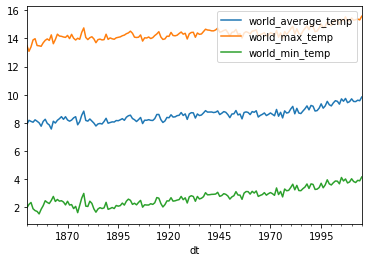

In [102]:
# World first:
world.resample('Y').mean().plot()

<AxesSubplot:xlabel='dt'>

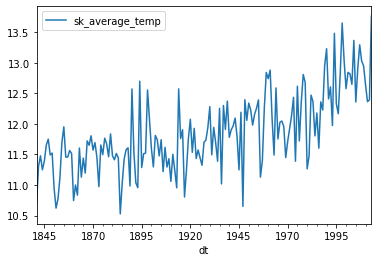

In [103]:
# Now SK:
south_korea.resample('Y').mean().plot()

<AxesSubplot:xlabel='dt'>

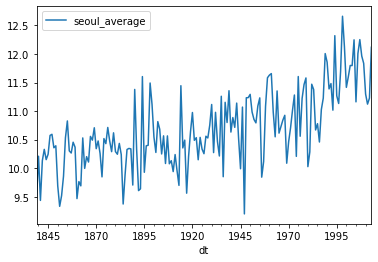

In [104]:
# And Seoul!
seoul.resample('Y').mean().plot()

Seoul seems slightly cooler than South Korea as a whole? And Slightly higher than the world on average? Let's join, plot, and see!

In [105]:
df = seoul.join(south_korea, how="left")

In [106]:
df.head()

,seoul_average,sk_average_temp
dt,,
1839-01-01,-4.570,NaN
1839-02-01,-2.520,NaN
1839-03-01,0.678,NaN
1839-04-01,8.828,NaN
1839-05-01,14.278,NaN


In [107]:
df = df.join(world, how='left')
df.head()

,seoul_average,sk_average_temp,world_average_temp,world_max_temp,world_min_temp
dt,,,,,
1839-01-01,-4.570,NaN,NaN,NaN,NaN
1839-02-01,-2.520,NaN,NaN,NaN,NaN
1839-03-01,0.678,NaN,NaN,NaN,NaN
1839-04-01,8.828,NaN,NaN,NaN,NaN
1839-05-01,14.278,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='dt'>

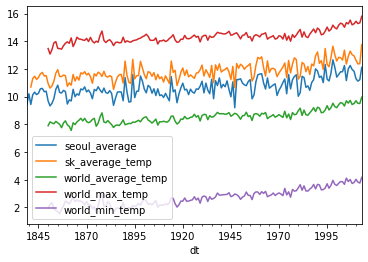

In [108]:
df.resample('Y').mean().plot()

So we see Seoul (Blue) Average Temp is well below the world max temp, and below the average of South Korea, but is higher than the World Averge. I wonder if the difference between world Average/World Max and Seoul's Average will help predict in the future.

In [109]:
# df['dif_avg'] = df.AverageTemperature - df.world_average_temp
# df['dif_max'] = df.AverageTemperature - df.world_max_temp
# df.head()

How about we work with from 2005 and on.

In [110]:
df = df.tail(104)

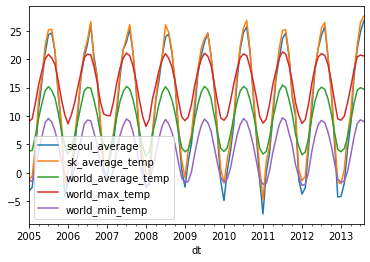

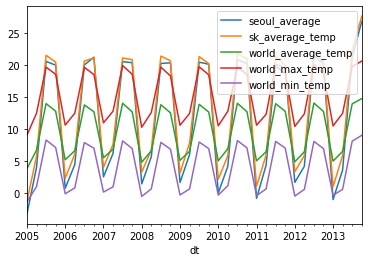

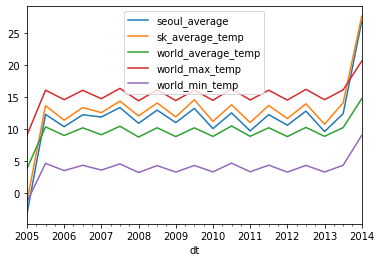

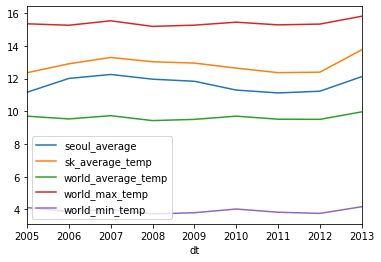

In [111]:
df.resample('M').mean().plot()
df.resample('3M').mean().plot()
df.resample('6M').mean().plot()
df.resample('Y').mean().plot()
plt.show()

Looking at the graphs, world temp would have minimal affect on predictions.

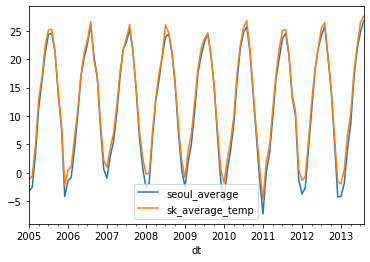

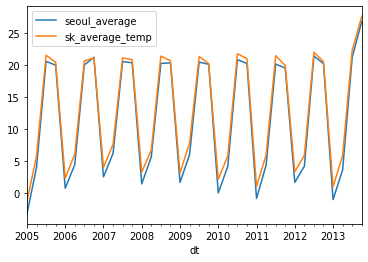

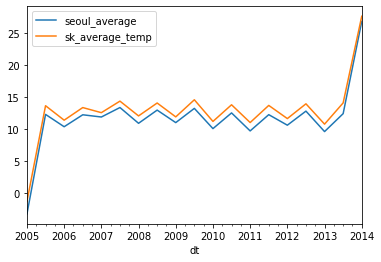

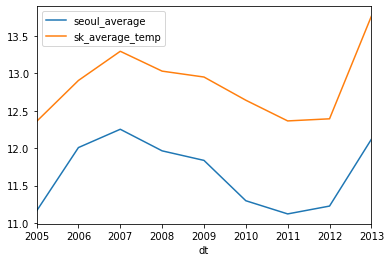

In [112]:
del df['world_average_temp']
del df['world_max_temp']
del df['world_min_temp']
df.resample('M').mean().plot()
df.resample('3M').mean().plot()
df.resample('6M').mean().plot()
df.resample('Y').mean().plot()
plt.show()

In [113]:
df['difference'] = df.sk_average_temp - df.seoul_average
df.head()

,seoul_average,sk_average_temp,difference
dt,,,
2005-01-01,-3.260,-1.312,1.948
2005-02-01,-2.614,-0.589,2.025
2005-03-01,3.197,4.777,1.580
2005-04-01,11.411,13.071,1.660
2005-05-01,16.160,16.877,0.717


----

In [114]:
corr, p = stats.pearsonr(df.seoul_average, df.sk_average_temp)
corr, p

(0.9986261569930233, 1.8589320092352623e-132)

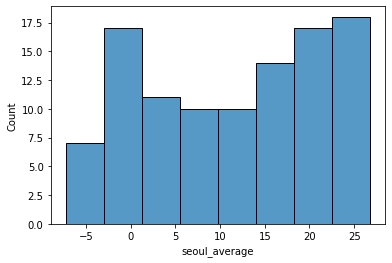

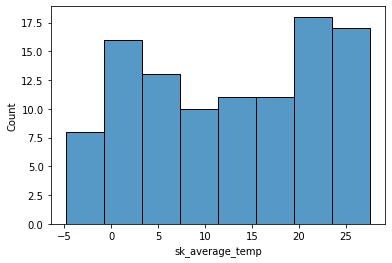

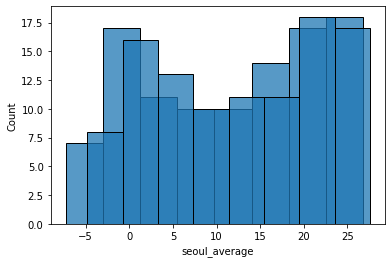

In [115]:
sns.histplot(data= df, x='seoul_average')
plt.show()
sns.histplot(data= df, x='sk_average_temp')
plt.show()
sns.histplot(data= df, x='seoul_average')
sns.histplot(data= df, x='sk_average_temp')
plt.show()

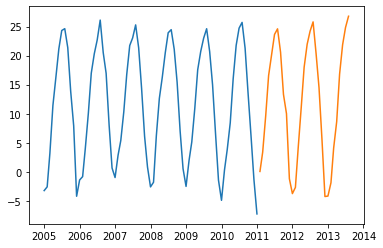

In [116]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index]
test = df[test_start_index:]

plt.plot(train.index, train.seoul_average)
plt.plot(test.index, test.seoul_average)

In [117]:
# seoul temps from train, sk temps from train
y = train.seoul_average
y2 = train.sk_average_temp
y, y2

(dt
 2005-01-01    -3.260
 2005-02-01    -2.614
 2005-03-01     3.197
 2005-04-01    11.411
 2005-05-01    16.160
                ...  
 2010-09-01    21.278
 2010-10-01    13.663
 2010-11-01     6.161
 2010-12-01    -1.366
 2011-01-01    -7.279
 Name: seoul_average, Length: 73, dtype: float64,
 dt
 2005-01-01    -1.312
 2005-02-01    -0.589
 2005-03-01     4.777
 2005-04-01    13.071
 2005-05-01    16.877
                ...  
 2010-09-01    21.748
 2010-10-01    14.310
 2010-11-01     7.219
 2010-12-01     0.710
 2011-01-01    -4.818
 Name: sk_average_temp, Length: 73, dtype: float64)

<AxesSubplot:ylabel='Frequency'>

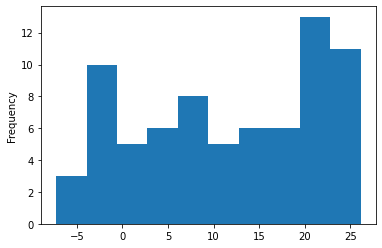

In [118]:
y.plot.hist()

<AxesSubplot:ylabel='Frequency'>

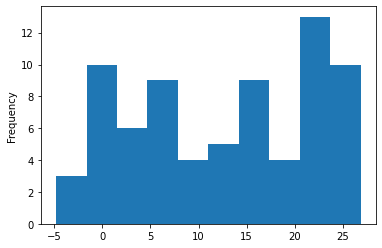

In [119]:
y2.plot.hist()

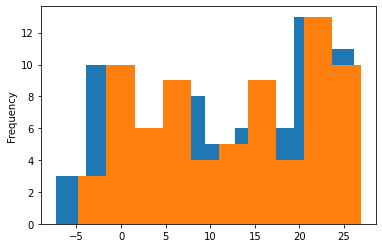

In [120]:
y.plot.hist()
y2.plot.hist()
plt.show()

[Text(0.5, 1.0, 'Average Temperature For Seoul by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Temp (C)')]

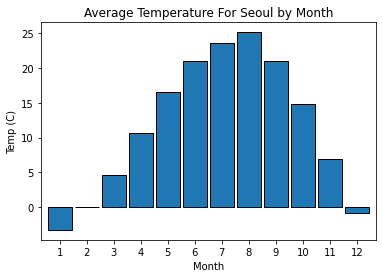

In [121]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature For Seoul by Month', xlabel='Month', ylabel='Temp (C)')


[Text(0.5, 1.0, 'Average Temperature For South Korea by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Temp (C)')]

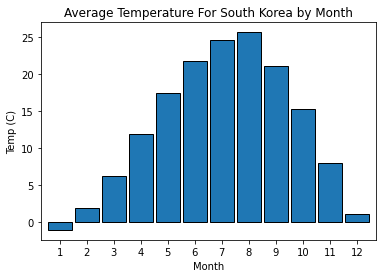

In [122]:
ax = y2.groupby(y2.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature For South Korea by Month', xlabel='Month', ylabel='Temp (C)')


[Text(0.5, 1.0, 'Average Temperature For Seoul by Year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Temp (C)')]

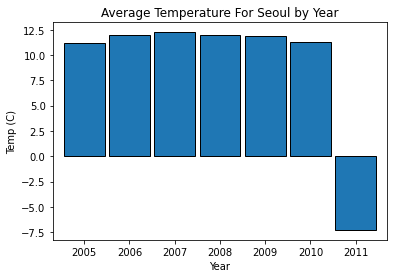

In [123]:
ax = y.groupby(y.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature For Seoul by Year', xlabel='Year', ylabel='Temp (C)')


[Text(0.5, 1.0, 'Average Temperature For South Korea by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Temp (C)')]

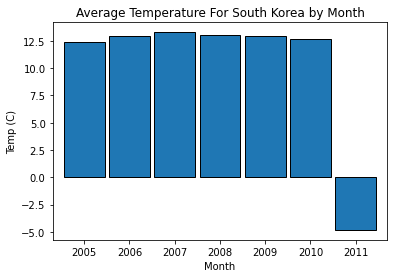

In [124]:
ax = y2.groupby(y2.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature For South Korea by Month', xlabel='Month', ylabel='Temp (C)')


2011 is looking a bit odd, is that because we only have a winter month due to the split?

In [125]:
train.tail()

,seoul_average,sk_average_temp,difference
dt,,,
2010-09-01,21.278,21.748,0.470
2010-10-01,13.663,14.310,0.647
2010-11-01,6.161,7.219,1.058
2010-12-01,-1.366,0.710,2.076
2011-01-01,-7.279,-4.818,2.461


It is. That's fine. Let's go back and split in a way that 2011 isn't missing a month.

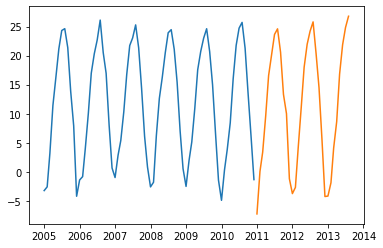

In [126]:
train = df[:'2010']
test = df['2011':]

plt.plot(train.index, train.seoul_average)
plt.plot(test.index, test.seoul_average)

In [127]:
# seoul temps from train, sk temps from train (again)
y = train.seoul_average
y2 = train.sk_average_temp
y.head(), y2.head()

(dt
 2005-01-01    -3.260
 2005-02-01    -2.614
 2005-03-01     3.197
 2005-04-01    11.411
 2005-05-01    16.160
 Name: seoul_average, dtype: float64,
 dt
 2005-01-01    -1.312
 2005-02-01    -0.589
 2005-03-01     4.777
 2005-04-01    13.071
 2005-05-01    16.877
 Name: sk_average_temp, dtype: float64)

Now 2011 has all of it's Data, hopefully that will help! As such, let's try a seasonal decomposition.

In [128]:
result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
dt,,,,
2005-01-01,-3.260,NaN,-14.332607,NaN
2005-02-01,-2.614,NaN,-11.348974,NaN
2005-03-01,3.197,NaN,-6.931149,NaN
2005-04-01,11.411,NaN,-1.363840,NaN
2005-05-01,16.160,NaN,4.874076,NaN


<AxesSubplot:xlabel='dt'>

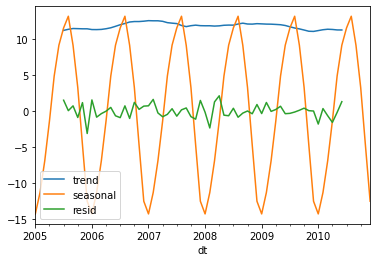

In [129]:
decomposition.iloc[:, 1:].plot()

<AxesSubplot:xlabel='dt'>

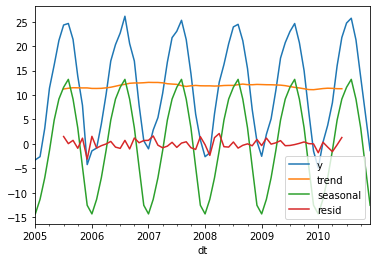

In [130]:
decomposition.plot()

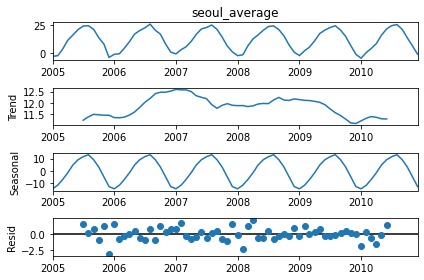

In [131]:
result.plot()
plt.show()

In [132]:
train = train.resample('M').mean()
train['temp_bin'] = pd.qcut(train.seoul_average, 4, labels=['cold', 'cool', 'warm', 'hot'])
train.groupby('temp_bin').mean()

,seoul_average,sk_average_temp,difference
temp_bin,,,
cold,-1.170833,0.793056,1.963889
cool,7.395556,8.681444,1.285889
warm,17.379667,17.898833,0.519167
hot,23.409667,24.073278,0.663611


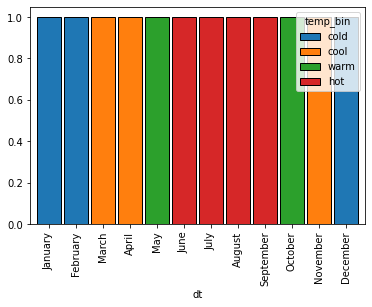

In [133]:
ax = (train['2010']
 .groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.show()

> Wow Helpful, I could have told you that!

In [134]:
train.index.year.unique()

Int64Index([2005, 2006, 2007, 2008, 2009, 2010], dtype='int64', name='dt')

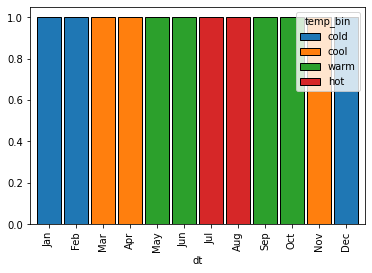

In [135]:
ax = (train['2009']
.groupby('temp_bin')
.resample('M')
.size()
.unstack(0)
.plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%b') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.show()

Only 2009 has a different pattern from 2005 - 2010. With a much more mild summer.

------
Looking at Types of Modeling, The FB Prophet Model would proabbly be moest accurate for a long period, Holt's Linear Trend might be better for a shorter period, but we'll see!

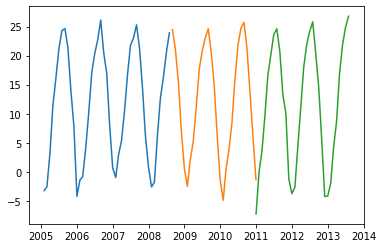

In [136]:
# Making a Validate DataFrame!
validate = train['2008-08':]
train = train[:'2008-07']

plt.plot(train.index, train.seoul_average)
plt.plot(validate.index, validate.seoul_average)
plt.plot(test.index, test.seoul_average)
plt.show()


Okay, I'm not sure I like that split, so let's try this one?

In [137]:
def split(df):
    train_size = int(len(df) * .5)
    validate_size = int(len(df) * .3)
    test_size = int(len(df) - train_size - validate_size)
    validate_end_index = train_size + validate_size

    # split into train, validation, test
    train = df[: train_size]
    validate = df[train_size : validate_end_index]
    test = df[validate_end_index : ]
    return train, validate, test

In [138]:
df.head()

,seoul_average,sk_average_temp,difference
dt,,,
2005-01-01,-3.260,-1.312,1.948
2005-02-01,-2.614,-0.589,2.025
2005-03-01,3.197,4.777,1.580
2005-04-01,11.411,13.071,1.660
2005-05-01,16.160,16.877,0.717


In [139]:
train, validate, test = split(df)

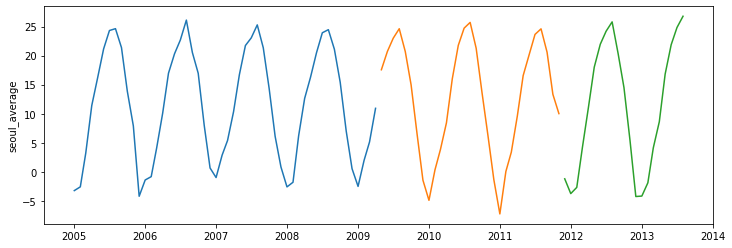

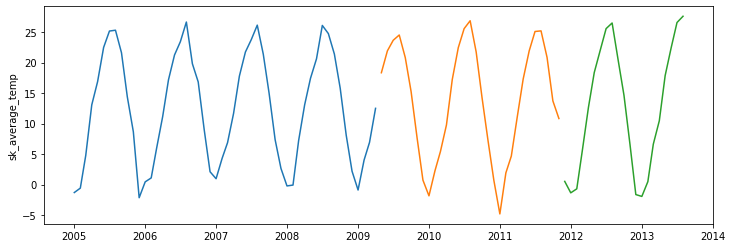

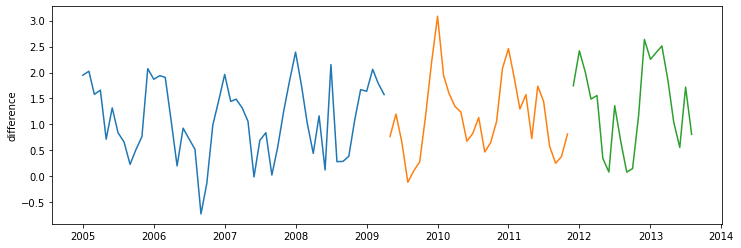

In [140]:

for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.show()

In [141]:

def evaluate(validate, yhat_df, target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse


In [142]:
# plot and evaluate 
def plot_and_eval(train, validate, yhat_df ,target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(validate, yhat_df, target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()


In [143]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store rmse for comparison purposes
def append_eval_df(validate, yhat_df, model_type, target_var):
    rmse = evaluate(validate, yhat_df, target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)


In [144]:
seoul_temp = train['seoul_average'][-1:][0]

yhat_df = pd.DataFrame({'seoul_temp': [seoul_temp]}, 
                       index = validate.index)

yhat_df.head(2)

,seoul_temp
dt,
2009-05-01,10.921
2009-06-01,10.921


Grabbed the Prophet Predict from FB as well. But let's start with Holt's Linear Trend

In [145]:
for col in train.columns:
    model = Holt(train[col], exponential = False)
    model = model.fit(smoothing_level = .1, 
                      smoothing_slope = .1, 
                      optimized = False)
    yhat_items = model.predict(start = validate.index[0], 
                               end = validate.index[-1])
    yhat_df[col] = round(yhat_items, 2)


seoul_average -- RMSE: 15


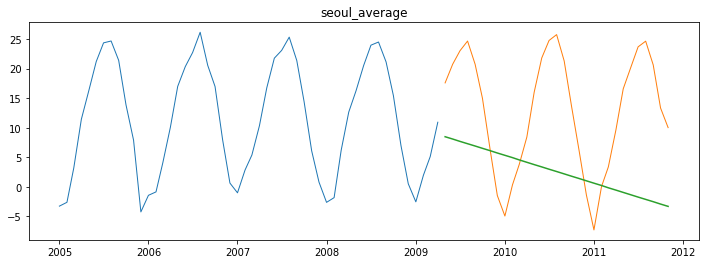

sk_average_temp -- RMSE: 14


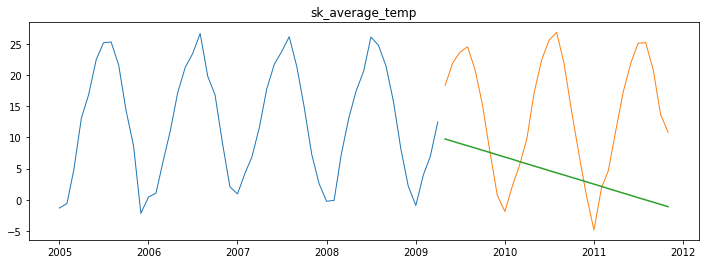

difference -- RMSE: 1


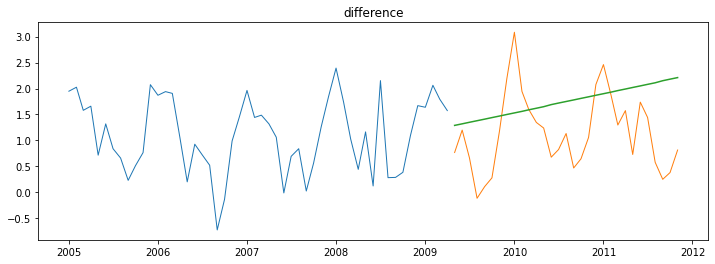

In [146]:
for col in train.columns:
    plot_and_eval(train, validate, yhat_df, target_var = col)


In [147]:
yhat_df

,seoul_temp,seoul_average,sk_average_temp,difference
dt,,,,
2009-05-01,10.921,8.47,9.76,1.29
2009-06-01,10.921,8.08,9.39,1.32
2009-07-01,10.921,7.68,9.03,1.35
2009-08-01,10.921,7.29,8.67,1.38
2009-09-01,10.921,6.90,8.31,1.41
2009-10-01,10.921,6.51,7.95,1.44
2009-11-01,10.921,6.12,7.59,1.47
2009-12-01,10.921,5.72,7.22,1.50
2010-01-01,10.921,5.33,6.86,1.53


In [148]:
for col in train.columns:
    eval_df = append_eval_df(validate, yhat_df, model_type = 'Holts', 
                             target_var = col)
eval_df

,model_type,target_var,rmse
0,Holts,seoul_average,15.0
1,Holts,sk_average_temp,14.0
2,Holts,difference,1.0


In [149]:
df.tail()

,seoul_average,sk_average_temp,difference
dt,,,
2013-04-01,8.619,10.469,1.850
2013-05-01,16.818,17.862,1.044
2013-06-01,21.878,22.436,0.558
2013-07-01,24.852,26.571,1.719
2013-08-01,26.791,27.601,0.810


Okay, that looks nothing like the slightly sloping diagram.

----
On to Previous Cycle

In [150]:
train_pre = df[:'2011-08']
validate_pre = df["2011-09" :"2012-08"]
test_pre = df['2012-09': '2013-08']
yhat_df = train_pre['2010-09':'2011-08'] + train_pre.diff(12).mean()


In [151]:
train_pre.tail()

,seoul_average,sk_average_temp,difference
dt,,,
2011-04-01,9.605,11.180,1.575
2011-05-01,16.563,17.293,0.730
2011-06-01,20.182,21.920,1.738
2011-07-01,23.659,25.101,1.442
2011-08-01,24.620,25.200,0.580


In [152]:
yhat_df

,seoul_average,sk_average_temp,difference
dt,,,
2010-09-01,21.227309,21.721,0.493691
2010-10-01,13.612309,14.283,0.670691
2010-11-01,6.110309,7.192,1.081691
2010-12-01,-1.416691,0.683,2.099691
2011-01-01,-7.329691,-4.845,2.484691
2011-02-01,-0.009691,1.889,1.898691
2011-03-01,3.317309,4.638,1.320691
2011-04-01,9.554309,11.153,1.598691
2011-05-01,16.512309,17.266,0.753691


In [153]:
pd.concat([yhat_df.head(1), validate_pre.head(1)])

,seoul_average,sk_average_temp,difference
dt,,,
2010-09-01,21.227309,21.721,0.493691
2011-09-01,20.599000,20.851,0.252000


In [154]:
# set yhat_df to index of validate
yhat_df.index = validate_pre.index

len(yhat_df)


12

seoul_average -- RMSE: 2


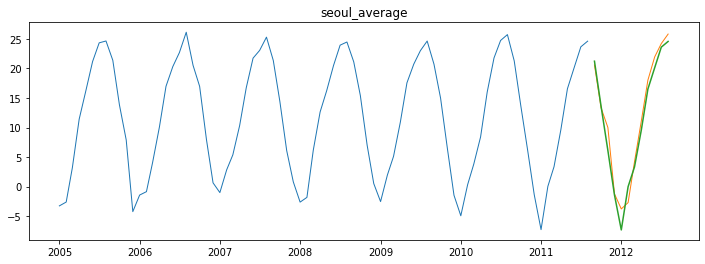

sk_average_temp -- RMSE: 2


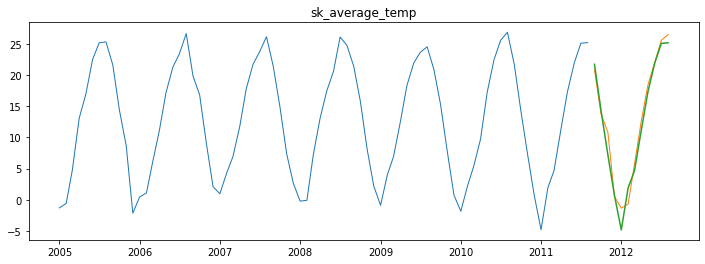

difference -- RMSE: 1


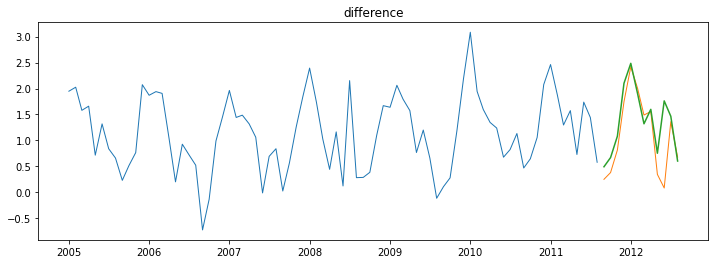

In [155]:
for col in train_pre.columns:
    plot_and_eval(train_pre, validate_pre, yhat_df, target_var = col)
    eval_df = append_eval_df(validate_pre, yhat_df, model_type = 'previous year', target_var = col)


In [156]:
eval_df

,model_type,target_var,rmse
0,Holts,seoul_average,15.0
1,Holts,sk_average_temp,14.0
2,Holts,difference,1.0
3,previous year,seoul_average,2.0
4,previous year,sk_average_temp,2.0
5,previous year,difference,1.0


That one looks a lot better, it didn't completely mimic the year before it, which is much better than Holts (such a disappointment Holts, your photo lies).

---
I still want to try the FB Prophet:

In [157]:
# Making a df for just seoul temps to work with.
seoul_temps = df.copy()

In [158]:
del seoul_temps['sk_average_temp']
del seoul_temps['difference']
seoul_temps

,seoul_average
dt,
2005-01-01,-3.260
2005-02-01,-2.614
2005-03-01,3.197
2005-04-01,11.411
2005-05-01,16.160
...,...
2013-04-01,8.619
2013-05-01,16.818
2013-06-01,21.878


In [159]:
seoul_temps = seoul_temps.reset_index()

In [160]:
seoul_temps = seoul_temps.rename(columns={'dt':'ds', 'seoul_average': 'y'})

In [161]:
train_p, validate_p, test_p = split(seoul_temps)
train_p.shape, validate_p.shape, test_p.shape

((52, 2), (31, 2), (21, 2))

In [162]:
train_p.tail()

,ds,y
47,2008-12-01,0.515
48,2009-01-01,-2.537
49,2009-02-01,1.955
50,2009-03-01,5.123
51,2009-04-01,10.921


In [163]:
m = Prophet()
m.fit(train_p)

09:17:22 - cmdstanpy - INFO - Chain [1] start processing
09:17:23 - cmdstanpy - INFO - Chain [1] done processing


In [164]:
future = m.make_future_dataframe(periods=1)
future = future[:-1]
future.tail()

,ds
47,2008-12-01
48,2009-01-01
49,2009-02-01
50,2009-03-01
51,2009-04-01


In [165]:
f = {'ds': ['2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01', '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01', '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01']}
f = pd.DataFrame(f)
future = future.append(f, ignore_index = True)
future.tail(13)

,ds
51,2009-04-01 00:00:00
52,2009-05-01
53,2009-06-01
54,2009-07-01
55,2009-08-01
56,2009-09-01
57,2009-10-01
58,2009-11-01
59,2009-12-01
60,2010-01-01


In [166]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      64 non-null     object
dtypes: object(1)
memory usage: 640.0+ bytes


In [167]:
future.ds = pd.to_datetime(future.ds)
future.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      64 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 640.0 bytes


In [168]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
59,2009-12-01,-0.537625,-1.769337,0.694640
60,2010-01-01,-1.727584,-3.039954,-0.433722
61,2010-02-01,0.377017,-0.893120,1.582001
62,2010-03-01,5.214356,4.029736,6.563791
63,2010-04-01,11.130318,9.968171,12.342837


In [169]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2005-01-01,-3.002901,-4.196101,-1.708827
1,2005-02-01,-0.644010,-2.008903,0.657115
2,2005-03-01,4.171463,2.863303,5.492092
3,2005-04-01,10.707407,9.450182,11.966611
4,2005-05-01,15.846950,14.575011,17.182007


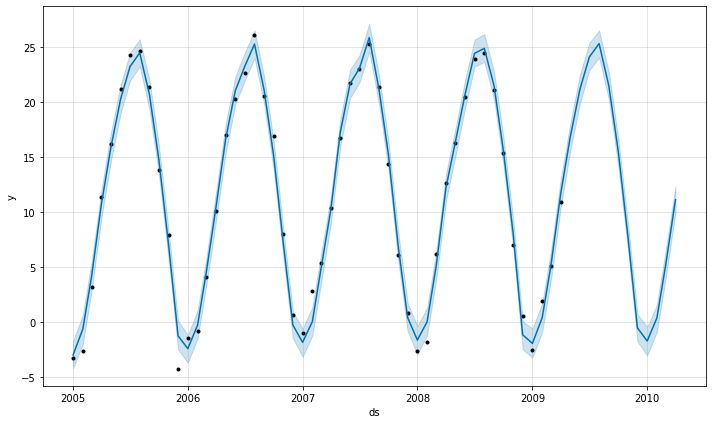

In [170]:
fig1 = m.plot(forecast)

In [171]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
plot_components_plotly(m, forecast)


While I really like what Prophet is doing, I don't understand it well enough to check its predictions in any meaningful way.

Looking at Cross Validations, there might not be a work around to only having month and year vs. day month and year that Cross Validations wants.

There is a Monthly Data section I'll have to read back on when project isn't due.

-----
#### Evaluate:

In [172]:
# get the min rmse for each variable

min_rmse_seoul = eval_df.groupby('target_var')['rmse'].min()[0]
min_rmse_sk = eval_df.groupby('target_var')['rmse'].min()[1]

# filter only the rows that match those rmse to find out 
# which models are best thus far
eval_df[((eval_df.rmse == min_rmse_seoul) | 
         (eval_df.rmse == min_rmse_sk)
        )]


,model_type,target_var,rmse
2,Holts,difference,1.0
3,previous year,seoul_average,2.0
4,previous year,sk_average_temp,2.0
5,previous year,difference,1.0


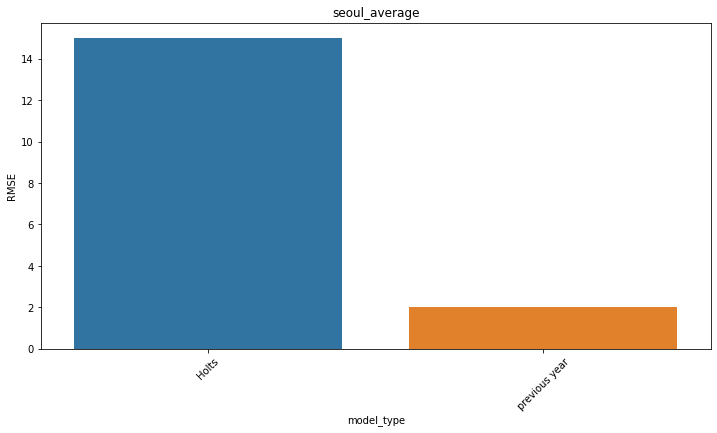

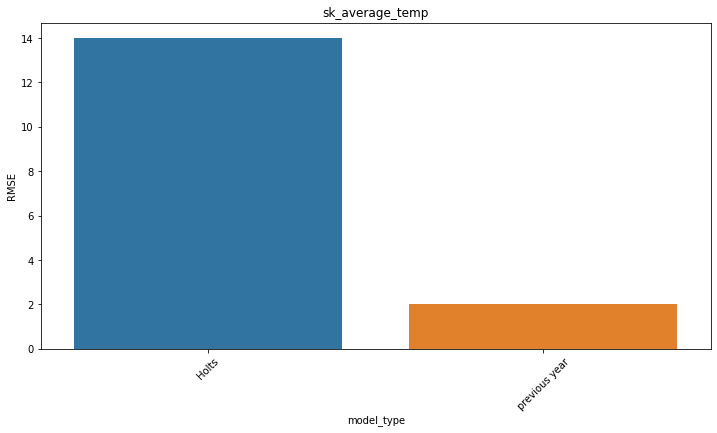

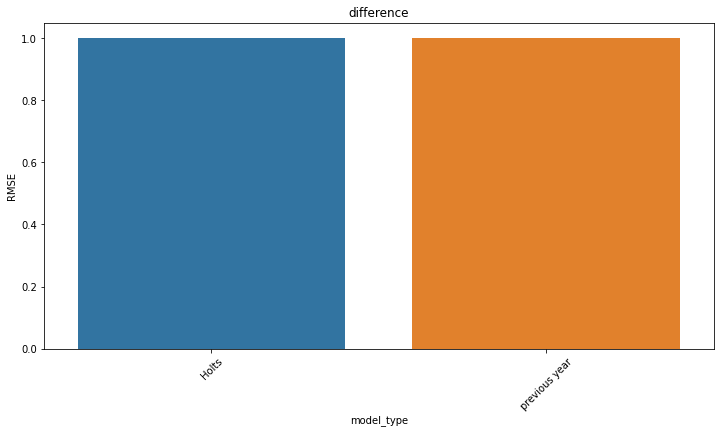

In [173]:
for col in train.columns:
    x = eval_df[eval_df.target_var == col]['model_type']
    y = eval_df[eval_df.target_var == col]['rmse']
    plt.figure(figsize=(12, 6))
    sns.barplot(x, y)
    plt.title(col)
    plt.ylabel('RMSE')
    plt.xticks(rotation=45)
    plt.show()


As Previous Year is preforming best of the models I can work with right now, we'll use that for Out-of-Sample testing!

In [174]:
# yhat for test:
yhat_df = validate_pre + train_pre.diff(12).mean()
yhat_df.index = test_pre.index

In [175]:
test.columns

Index(['seoul_average', 'sk_average_temp', 'difference'], dtype='object')

In [176]:
rmse_temp = round(sqrt(mean_squared_error(test_pre['seoul_average'], yhat_df['seoul_average'])), 2)
rmse_sk_average_temp = round(sqrt(mean_squared_error(test_pre['sk_average_temp'], yhat_df['sk_average_temp'])), 2)
rmse_difference = round(sqrt(mean_squared_error(test_pre['difference'], yhat_df['difference'])), 2)

In [177]:
def plot_and_eval_test(train, validate, test, yhat_df, target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(test[target_var], label = 'Test', linewidth = 1)
    plt.plot(yhat_df[target_var], alpha = .5, color="red")
    plt.title(target_var)
    plt.legend()
    plt.show()
    

rmse - seoul_average: 1.84
rmse - sk_average_temp: 1.67
rmse - difference: 0.5


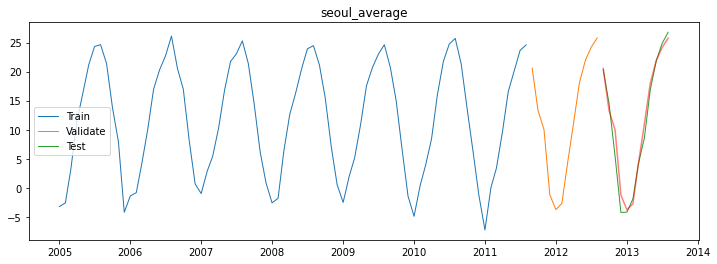

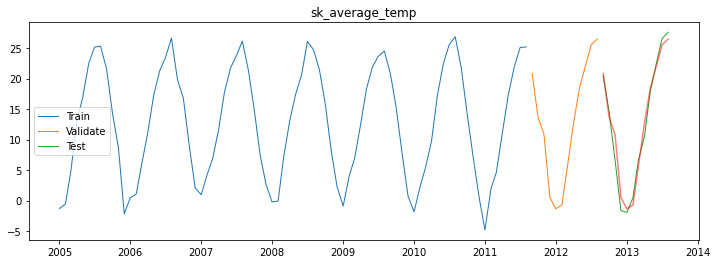

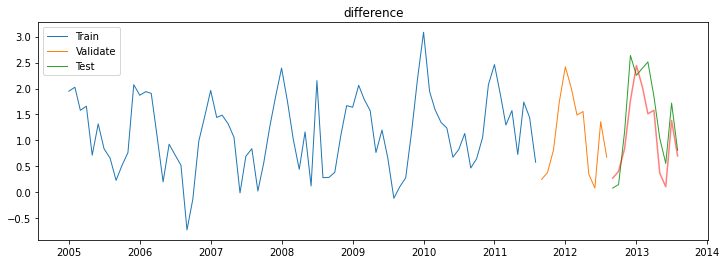

In [178]:
print(f"rmse - seoul_average: {rmse_temp}")
print(f"rmse - sk_average_temp: {rmse_sk_average_temp}")
print(f"rmse - difference: {rmse_difference}")
for col in train.columns:
    plot_and_eval_test(train_pre, validate_pre, test_pre, yhat_df, col)